In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Config
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load data
df = pd.read_csv('../data/train.csv')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce', format='mixed')


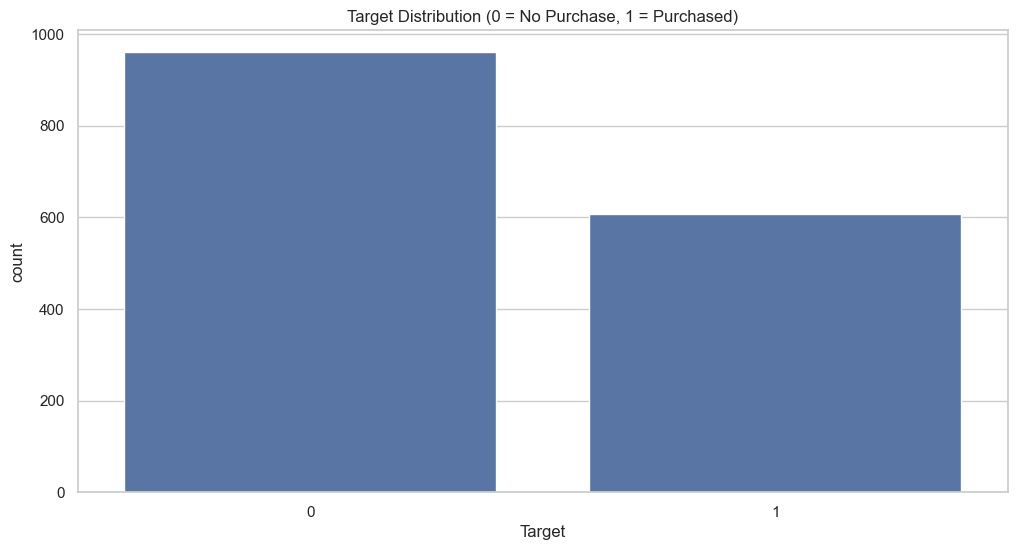

Target
0    0.612636
1    0.387364
Name: proportion, dtype: float64


In [2]:
# Plot target variable
sns.countplot(x='Target', data=df)
plt.title("Target Distribution (0 = No Purchase, 1 = Purchased)")
plt.show()

# Ratio
target_ratio = df['Target'].value_counts(normalize=True)
print(target_ratio)


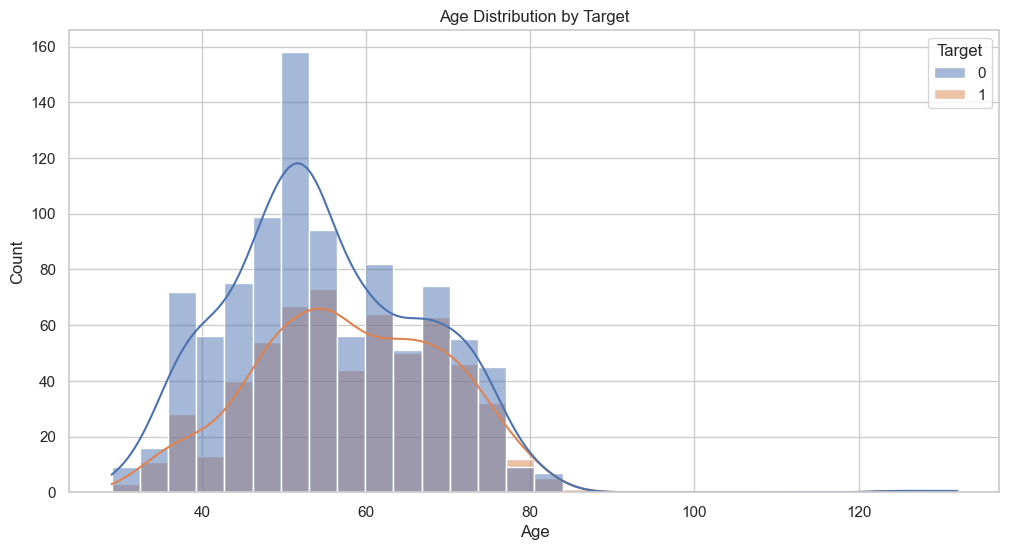

In [3]:
df['Age'] = pd.Timestamp.today().year - df['Year_Birth']
sns.histplot(data=df, x='Age', hue='Target', kde=True, bins=30)
plt.title("Age Distribution by Target")
plt.show()


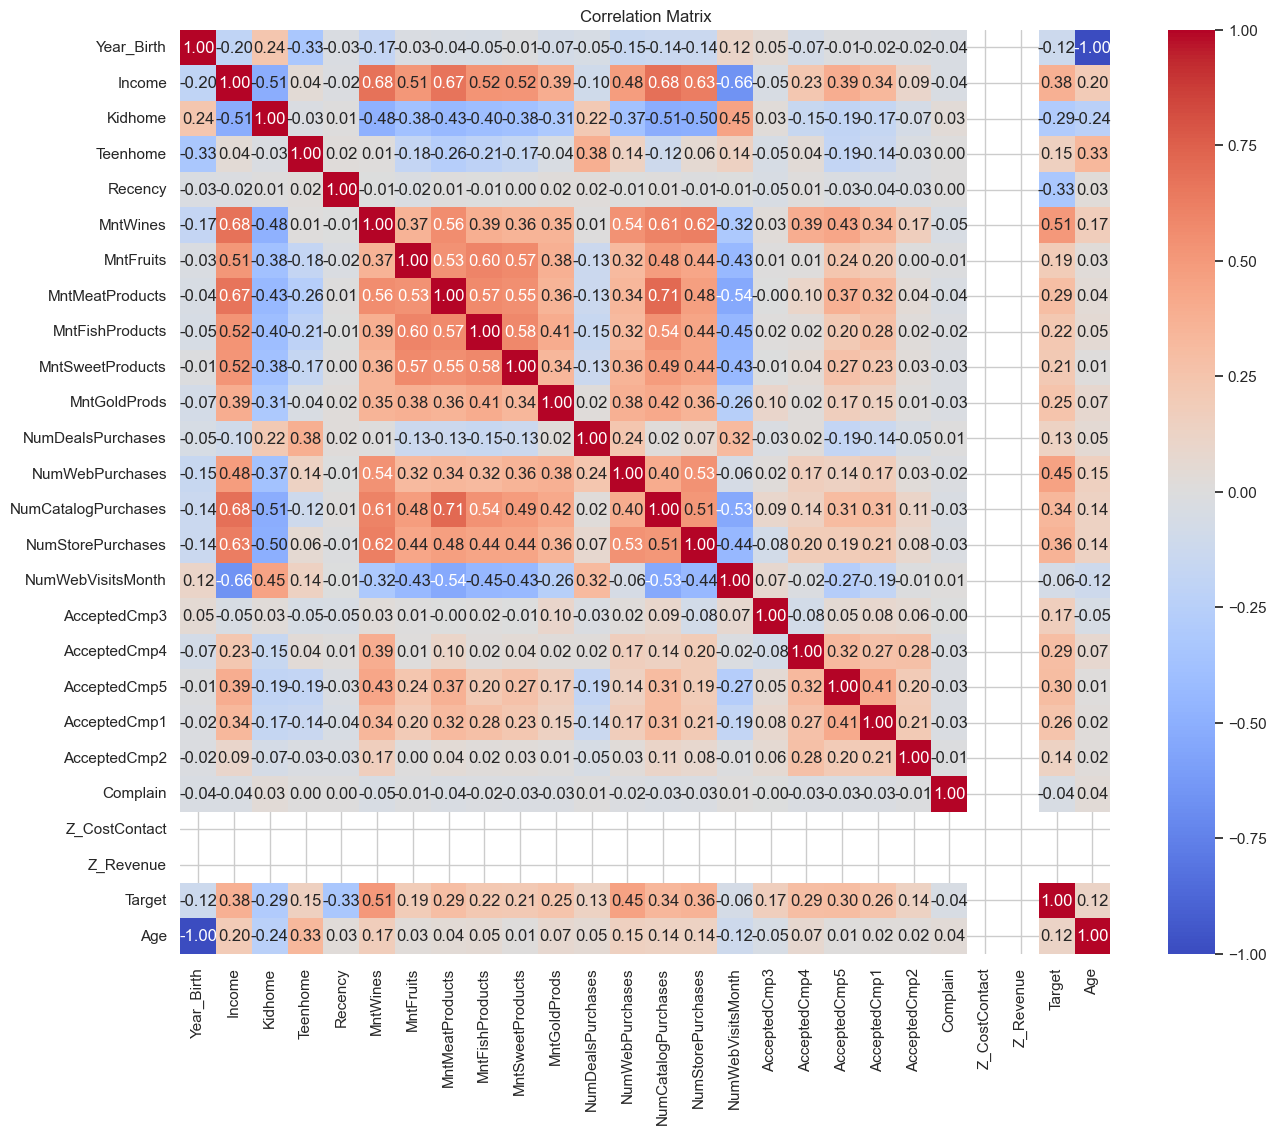

In [4]:
numeric_cols = df.select_dtypes(include=np.number).drop(columns=['ID']).columns
corr = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


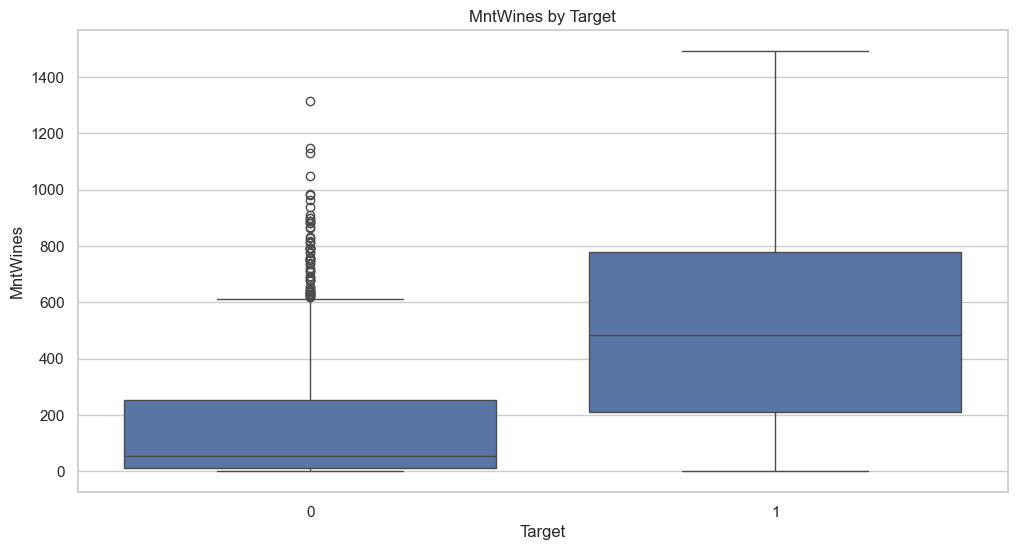

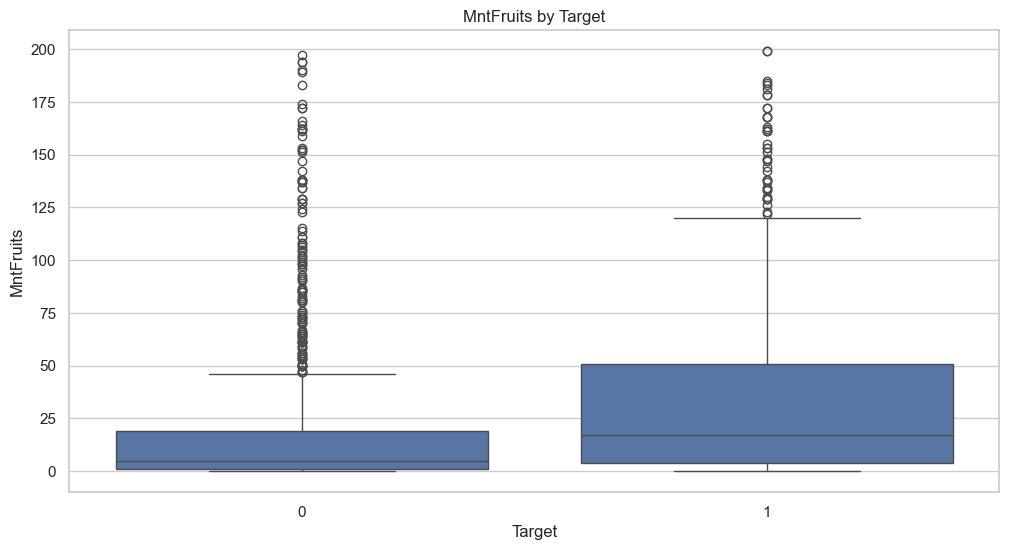

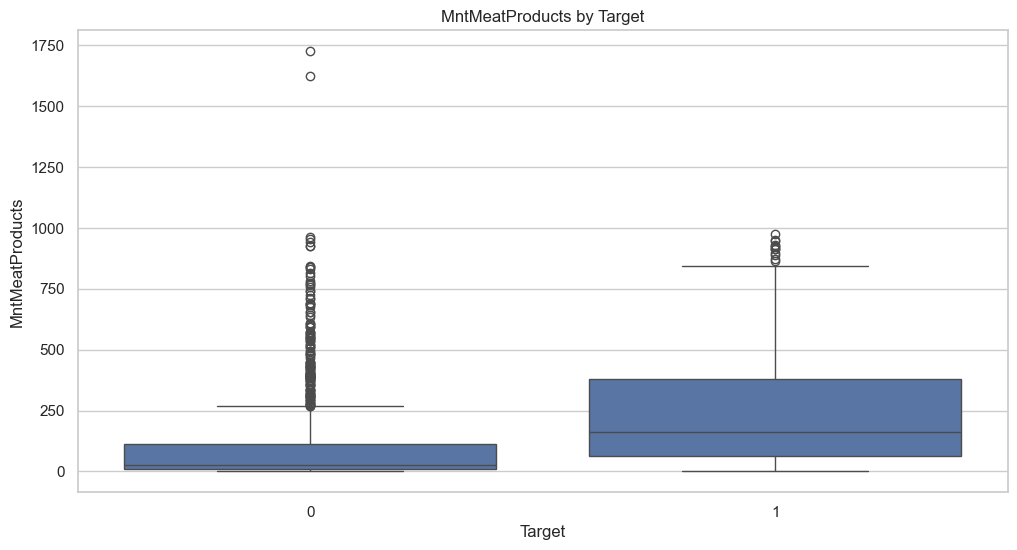

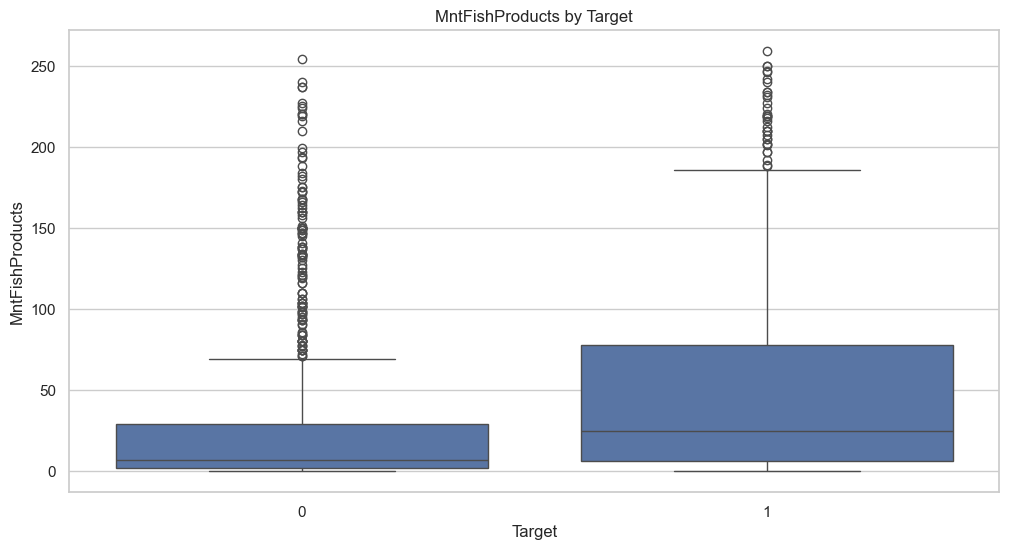

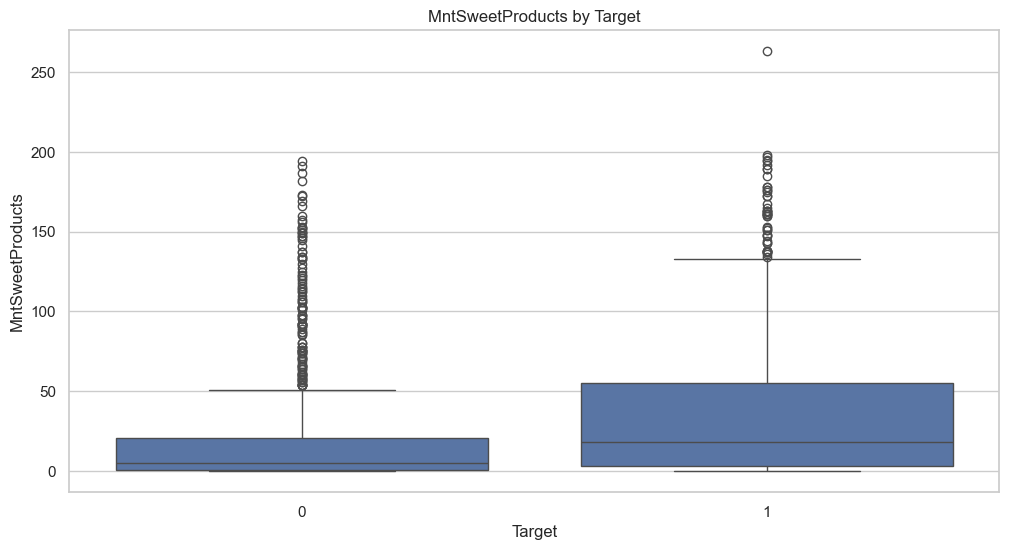

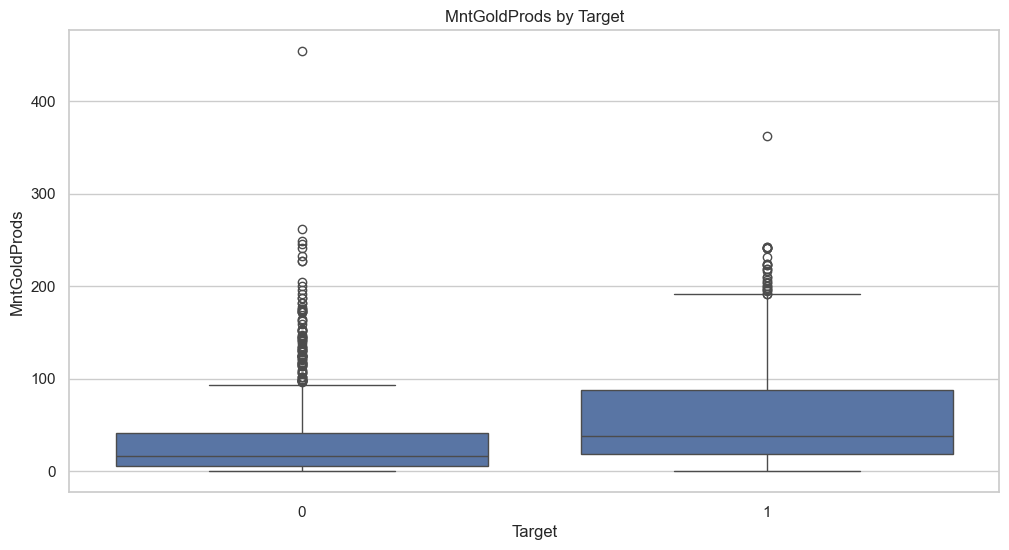

In [5]:
mnt_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for col in mnt_cols:
    sns.boxplot(x='Target', y=col, data=df)
    plt.title(f"{col} by Target")
    plt.show()
